In [35]:
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='quintic')

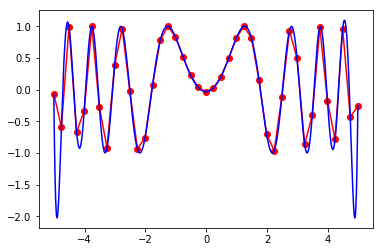

In [36]:
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.show()

In [71]:
from math import sqrt

def d3_svg_lineSlope(p0, p1):
    if p1[0] == p0[0]:
        return 0
    return (p1[1] - p0[1]) / (p1[0] - p0[0])

def d3_svg_lineFiniteDifferences(points):
    m = [0] * len(points)
    p0 = points[0]
    p1 = points[1]
    d = m[0] = d3_svg_lineSlope(p0, p1)
    for i in range(1, len(points)-1):
        p0 = p1
        p1 = points[i + 1]
        d1 = d3_svg_lineSlope(p0, p1)
        m[i] = (d + d1) / 2
        d = d1
    m[len(points)-1] = d
    return m



def d3_svg_lineMonotoneTangents(points):
    tangents = []
    m = d3_svg_lineFiniteDifferences(points)

    for i in range(len(points) - 1):
        d = d3_svg_lineSlope(points[i], points[i + 1])
        if abs(d) < 0.01:
          m[i] = m[i + 1] = 0
        else:
          a = m[i] / d
          b = m[i + 1] / d

          s = a * a + b * b
          if s > 9:
            s = d * 3 / sqrt(s)
            m[i] = s * a
            m[i + 1] = s * b

    for i in range(len(points)):
        p0 = points[min(len(points)-1, i + 1)]
        p1 = points[max(0, i - 1)]
        s = (p0[0] - p1[0]) / (6 * (1 + m[i] * m[i]))
        tangents.append([s, m[i] * s])

    return tangents

d3_svg_lineMonotoneTangents([[10, 10], [50, 10]])

[[6.666666666666667, 0.0], [6.666666666666667, 0.0]]